In [108]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib.pyplot as pl
from tensorflow import keras

In [109]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train[0] = x_train[0][0]/256
x_test[0] = x_test[0]/256

In [110]:
y_tr, y_te = [], []
for each in y_train:
    y_tr.append([int(i==each) for i in range(10)])
for each in y_te:
    y_te.append([int(i==each) for i in range(10)])
y_tr = np.array(y_tr)
y_te = np.array(y_te)
y_tr[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [111]:
batch_size = 256
buffer_size = x_train.shape[0]

In [112]:
x_train.shape

(60000, 28, 28)

In [113]:
#x_train = np.reshape(x_train, (x_train.shape[0], (28, 28, 1)))
#x_test = np.reshape(x_test, (x_test.shape[0], (28, 28, 1)))

In [115]:
model = tf.keras.Sequential()
layrs = [keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
          keras.layers.MaxPool2D((2, 2)),
          keras.layers.LeakyReLU(),
          keras.layers.Dropout(0.2),
          
          keras.layers.Conv2D(32, (3, 3), activation='relu'),
          keras.layers.MaxPool2D((2, 2)),
          keras.layers.LeakyReLU(),
          keras.layers.Dropout(0.2),

          keras.layers.Flatten(),
          keras.layers.Dense(20, activation='relu'),
          keras.layers.Dense(10, activation='relu'),
          keras.layers.Dense(10, activation='softmax')]

for each in layrs: model.add(each)
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer = optimizer, loss = loss, metrics=['acc'])

In [116]:
model.fit(x=x_train, y=y_tr, batch_size=batch_size, epochs=20, validation_split=0.1, shuffle=True)

Epoch 1/20
211/211 [==============================] - 9s 42ms/step - loss: 2.7078 - acc: 0.1638 - val_loss: 1.8625 - val_acc: 0.3108
Epoch 2/20
211/211 [==============================] - 8s 40ms/step - loss: 1.8254 - acc: 0.3152 - val_loss: 1.6793 - val_acc: 0.3325
Epoch 3/20
211/211 [==============================] - 8s 40ms/step - loss: 1.6670 - acc: 0.3369 - val_loss: 1.5765 - val_acc: 0.3418
Epoch 4/20
211/211 [==============================] - 9s 42ms/step - loss: 1.5233 - acc: 0.3808 - val_loss: 1.2127 - val_acc: 0.5163
Epoch 5/20
211/211 [==============================] - 9s 42ms/step - loss: 0.9992 - acc: 0.6339 - val_loss: 0.7760 - val_acc: 0.6913
Epoch 6/20
211/211 [==============================] - 9s 42ms/step - loss: 0.7657 - acc: 0.7013 - val_loss: 0.5018 - val_acc: 0.8402
Epoch 7/20
211/211 [==============================] - 9s 42ms/step - loss: 0.4437 - acc: 0.8509 - val_loss: 0.2957 - val_acc: 0.8837
Epoch 8/20
211/211 [==============================] - 9s 42ms/step - 

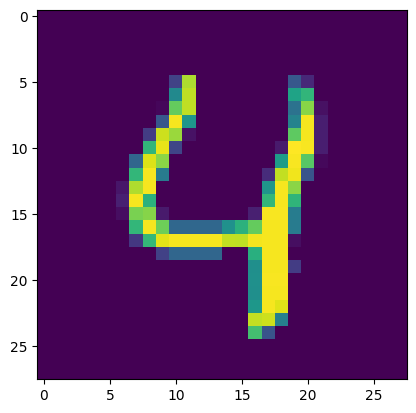

In [117]:
fig, ax = plt.subplots()
im = ax.imshow(np.reshape(x_test[4], (28, 28)))

In [119]:
x_test[4].shape

(28, 28)

In [124]:
model.predict(np.reshape(x_test[4], (1, 28, 28, 1)))

1/1 [==============================] - 0s 26ms/step


array([[1.1620321e-09, 6.7563627e-10, 3.0752018e-12, 2.5221259e-11,
        9.9976140e-01, 9.1469969e-09, 2.8326632e-08, 3.9863215e-09,
        4.8128412e-10, 2.3858265e-04]], dtype=float32)